# Star Wars Survey
While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which can be downloaded from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In this project, we'll be cleaning and exploring this data set.

The data has several columns, including:
- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

Let's begin by importing relevant modules, reading the file and start exploring the data:

In [1]:
import pandas as pd
import numpy as np

sw = pd.read_csv("star_wars.csv", encoding="Latin-1")
sw.head(15)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

We immediatly notice a RespondentID that is missing. This is supposed to be a unique identifier, thus its occational absence legitimizes removal of such rows: 

In [2]:
sw = sw[sw['RespondentID'].notnull()]

As there are many columns, these are not all displayed by default when printing. Let's look at them in a more condensed way:

In [3]:
sw.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

# Converting the following 2 columns to boolean
Take a look at the next two columns, which are:
- "Have you seen any of the 6 films in the Star Wars franchise?"
- "Do you consider yourself to be a fan of the Star Wars film franchise?"

Both represent `Yes/No questions`. They can also be `NaN` where a respondent chooses not to answer a question. These are represented as strings as of now. Let's just confirm that this is the case over the board:

In [4]:
print(sw['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False), "\n")
print(sw['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64 

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


With that confirmed, the binary nature of the answers allows us to convert the answers to boolean values. This makes analysis simpler as we don't have to do string comparisons when we want to select rows.

In [5]:
yes_no_map = {"Yes": True, "No": False}

sw['Have you seen any of the 6 films in the Star Wars franchise?'] = sw['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no_map)
sw['Do you consider yourself to be a fan of the Star Wars film franchise?'] = sw['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no_map)

print(sw['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False), "\n")
print(sw['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64 

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


# Cleaning the checkbox (represented as the next 6 columns)
The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

- `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
- `Unnamed: 4` - Whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
- `Unnamed: 5` - Whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
- `Unnamed: 6` - Whether or not the respondent saw `Star Wars: Episode IV A New Hope`.
- `Unnamed: 7` - Whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
- `Unnamed: 8` - Whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the columns something more intuitive.

In [6]:
val_map = {np.nan: False,
            "Star Wars: Episode I  The Phantom Menace": True,
            "Star Wars: Episode II  Attack of the Clones": True,
            "Star Wars: Episode III  Revenge of the Sith": True,
            "Star Wars: Episode IV  A New Hope": True,
            "Star Wars: Episode V The Empire Strikes Back": True,
            "Star Wars: Episode VI Return of the Jedi": True
}

for col in sw.columns[3:9]:
    sw[col] = sw[col].map(val_map)

sw.iloc[:,3:9].head(10)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
10,False,True,False,False,False,False


In [7]:
naming_dict = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen1",
    "Unnamed: 4": "seen2",
    "Unnamed: 5": "seen3",
    "Unnamed: 6": "seen4",
    "Unnamed: 7": "seen5",
    "Unnamed: 8": "seen6",
}

sw = sw.rename(naming_dict, axis=1)

sw.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen1', 'seen2', 'seen3', 'seen4', 'seen5', 'seen6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you co

Now we've achieved more intuitive columns names as well as altered the representaion of the answers to be booleans.

# Cleaning next 6 columns
The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

The columns for this question are:
- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
- `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`
- `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
- `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`
- `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
- `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [8]:
sw[sw.columns[9:15]] = sw[sw.columns[9:15]].astype(float)

naming_dict_2 = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank_1',
                'Unnamed: 10': 'rank_2',
                'Unnamed: 11': 'rank_3',
                'Unnamed: 12': 'rank_4',
                'Unnamed: 13': 'rank_5',
                'Unnamed: 14': 'rank_6'}

sw = sw.rename(naming_dict_2, axis=1)

sw.iloc[:,9:15].head()

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


# Finding highest ranking movie
With the ranking-columns converted to float-type we can examine them numericly. Let's utilize this by calculating and visualizing mean ranking for each movie:

rank_1    3.732934
rank_2    4.087321
rank_3    4.341317
rank_4    3.272727
rank_5    2.513158
rank_6    3.047847
dtype: float64


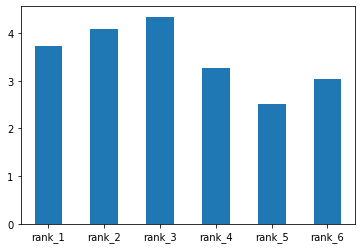

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

means = sw[sw.columns[9:15]].mean()
print(means)

means.plot(kind='bar', rot=0)
plt.show()

- Star Wars IV, V and VI (i.e the original trilogy) has lower means, hence gets ranked higher on average (since a low rank considered is good in this context). This is not very suprising since these are generally referred to as superior to I, II and III.
- Star Wars V is the most favored movie on average.
- Star Wars III is the least favored movie on average.

# How many have seen the movies?
With the `seen`-columns cleaned up we now can sum these up and visualize how many have seen the respective movies:

In [10]:
seen_sums = sw[sw.columns[3:9]].sum()
seen_sums

seen1    673
seen2    571
seen3    550
seen4    607
seen5    758
seen6    738
dtype: int64

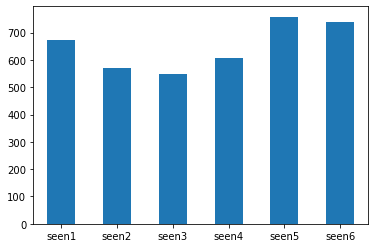

In [11]:
seen_sums.plot(kind='bar', rot=0)

Star Wars V and VI have been seen by most people. Interestingly, these are also the two movies that are the highest ranked according to previous analysis. A correlation between views and rating can be sensed for the movies. It is reasonable to assume that the more a person likes a movie, the more likely that person is to recommend it to others. 

The two movies that stand out in this regard is Star Wars IV and I, as they should switch positions for the previously mentioned correlation to be more apparent. The fact that Star Wars IV has lower views can be due to it being the first movie in a previously unknown franchise. The fact that Star Wars I has higher views can be due a lot of hype being built up after a long break in this very beloved series.

# Different segments

There are several columns that split the data in two segments:
- `Do you consider yourself to be a fan of the Star Wars film franchise?` - `True` or `False`
- `Do you consider yourself to be a fan of the Star Trek franchise?` - `Yes` or `No`
- `Gender` - `Male` or `Female`

Let's focus on the `Gender`-column and redo some of our previous analysis to see if there are differences between the groups.

The number of male respondants is likely not the same as female. Therefore, when looking at the sum of views, we'll divide by the total number of respondants of that gender to make it relative instead of absolute.

In [12]:
n_males = (sw['Gender'] == 'Male').sum()
n_females = (sw['Gender'] == 'Female').sum()

mean_group = sw.groupby('Gender').agg(np.mean)[sw.columns[9:15]]
sum_group = sw.groupby('Gender').agg(sum)[sw.columns[3:9]]

sum_group.loc['Male'] = sum_group.loc['Male']/n_males
sum_group.loc['Female'] = sum_group.loc['Female']/n_females

print(mean_group, '\n')
print(sum_group)

          rank_1    rank_2    rank_3    rank_4    rank_5    rank_6
Gender                                                            
Female  3.429293  3.954660  4.418136  3.544081  2.569270  3.078086
Male    4.037825  4.224586  4.274882  2.997636  2.458629  3.002364 

           seen1     seen2     seen3     seen4     seen5     seen6
Gender                                                            
Female  0.542805  0.431694  0.404372  0.464481  0.642987  0.615665
Male    0.726358  0.649899  0.637827  0.688129  0.788732  0.778672


(0.0, 5.0)

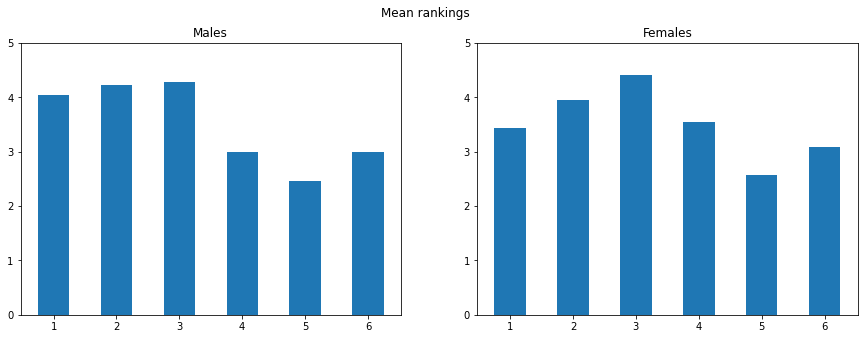

In [13]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

fig.suptitle('Mean rankings')
bar_positions = np.arange(1,7)

axs[0].bar(x=bar_positions, height=mean_group.loc['Male', :].values, width=0.5)
axs[0].set_title('Males')
axs[0].set_ylim(0,5)
axs[1].bar(x=bar_positions, height=mean_group.loc['Female', :].values, width=0.5)
axs[1].set_title('Females')
axs[1].set_ylim(0,5)

The biggest differences in terms of ranking is:
- Males rank Star Wars I, II and III about equally as poor. Females rank Star Wars I as average, II a bit worse and III as undoubtedly the worst
- Females seem to like the first movie, Star Wars IV, way less than males. They actually prefer Star Wars I to IV, which is a pretty significant difference to males.

(0.0, 1.0)

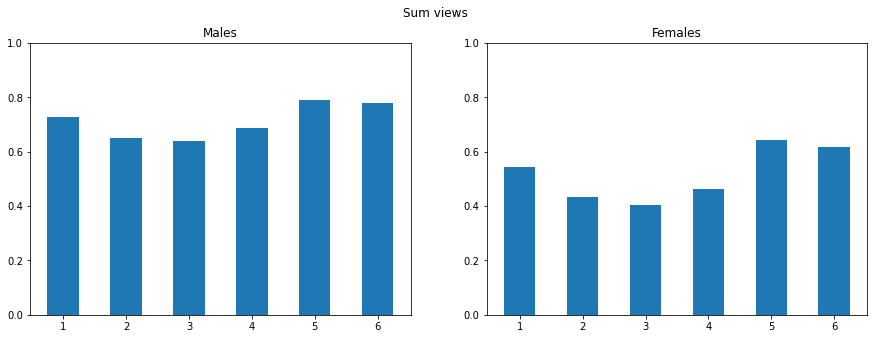

In [15]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

fig.suptitle('Sum views')
bar_positions = np.arange(1,7)

axs[0].bar(x=bar_positions, height=sum_group.loc['Male', :].values, width=0.5)
axs[0].set_title('Males')
axs[0].set_ylim(0,1)
axs[1].bar(x=bar_positions, height=sum_group.loc['Female', :].values, width=0.5)
axs[1].set_title('Females')
axs[1].set_ylim(0,1)

The internal ranking regarding which movies have been watched the most is pretty much intact. The main difference is that the females respondants on average have watched way fewer Star Wars movies than males. This difference is the most prevalent among movies I-IV.